In [47]:
import sys

sys.path.append("..")

from img_utils import get_exif_lazy
from pathlib import Path
import concurrent.futures

DIRS = [
    Path("/workspaces/cv/data/surveys/action-aviation-multicamera/20250331_west_coast_4camera_test/flight_1/cameras"),
    Path("/workspaces/cv/data/surveys/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/cameras"),
]
results = {}
for d in DIRS:
    res = []

    def do(fpath):
        exif = get_exif_lazy(fpath)
        res.append(
            {
                "shutterspeed": 1 / exif.get("exposure_time"),
                "iso": exif.get("photographic_sensitivity"),
                "brightness": exif.get("brightness_value"),
                "fpath": fpath,
            }
        )

    with concurrent.futures.ThreadPoolExecutor(max_workers=32) as executor:
        futures = [executor.submit(do, fpath) for fpath in d.rglob("*.JPG")]
        for idx, future in enumerate(concurrent.futures.as_completed(futures)):
            if idx % 100 == 0:
                print(f"Processed {idx} files", end="\r")
            try:
                future.result()
            except Exception as e:
                print(f"Error processing file: {e}", end="\r")
    results[d] = res
# #
# exposure_time  photographic_sensitivity

Processed 0 files
Processed 100 files
Processed 200 files
Processed 300 files
Processed 400 files
Processed 500 files
Processed 600 files
Processed 700 files
Processed 800 files
Processed 900 files
Processed 1000 files
Processed 1100 files
Processed 1200 files
Processed 1300 files
Processed 1400 files
Processed 1500 files
Processed 1600 files
Processed 1700 files
Processed 1800 files
Processed 1900 files
Processed 2000 files
Processed 2100 files
Processed 2200 files
Processed 2300 files
Processed 2400 files
Processed 2500 files
Processed 2600 files
Processed 2700 files
Processed 2800 files
Processed 2900 files
Processed 3000 files
Processed 3100 files
Processed 3200 files
Processed 3300 files
Processed 3400 files
Processed 3500 files
Processed 3600 files
Processed 3700 files
Processed 3800 files
Processed 3900 files
Processed 4000 files
Processed 4100 files
Processed 4200 files
Processed 4300 files
Processed 4400 files
Processed 4500 files
Processed 4600 files
Processed 4700 files
Proc

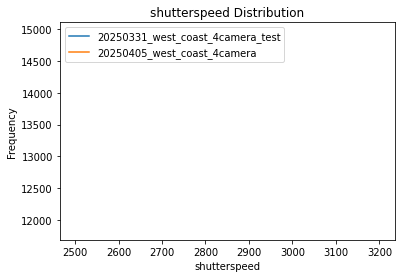

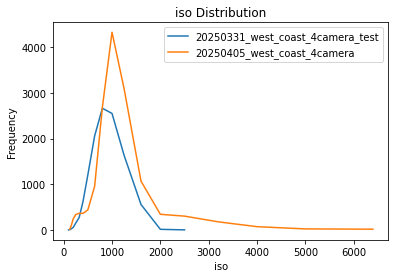

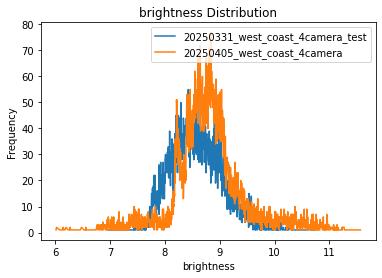

In [58]:
import matplotlib.pyplot as plt
from collections import Counter

# ISO:
for metric in ["shutterspeed", "iso", "brightness"]:
    plt.figure()
    for d in results:
        name = d.parent.parent.name
        vals = [r[metric] for r in results[d]]
        counts = sorted(Counter(vals).items())
        x = [d[0] for d in counts]
        y = [d[1] for d in counts]
        plt.plot(x, y, label=name)
        # plt.hist(vals, bins=100, alpha=0.5, label=name)
    plt.title(f"{metric} Distribution")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


In [59]:
[i for i in results[DIRS[1]] if i["iso"] > 5000]

[{'shutterspeed': 3200.0,
  'iso': 6400,
  'brightness': 6.20078125,
  'fpath': PosixPath('/workspaces/cv/data/surveys/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/cameras/R28/DCIM/10150405/_28R6105.JPG')},
 {'shutterspeed': 3200.0,
  'iso': 6400,
  'brightness': 6.13046875,
  'fpath': PosixPath('/workspaces/cv/data/surveys/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/cameras/R28/DCIM/10150405/_28R6106.JPG')},
 {'shutterspeed': 3200.0,
  'iso': 6400,
  'brightness': 6.0875,
  'fpath': PosixPath('/workspaces/cv/data/surveys/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/cameras/R09/DCIM/10250405/_09R2951.JPG')},
 {'shutterspeed': 3200.0,
  'iso': 6400,
  'brightness': 6.1109375,
  'fpath': PosixPath('/workspaces/cv/data/surveys/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/cameras/R09/DCIM/10250405/_09R2955.JPG')},
 {'shutterspeed': 3200.0,
  'iso': 6400,
  'brightness': 6.09140625,
  'fpath': PosixPath('/works